In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

In [2]:
data = pd.read_csv('HW1_problem1.txt', sep=" ", header = None)

g = nx.DiGraph()

g.add_weighted_edges_from(data.values)

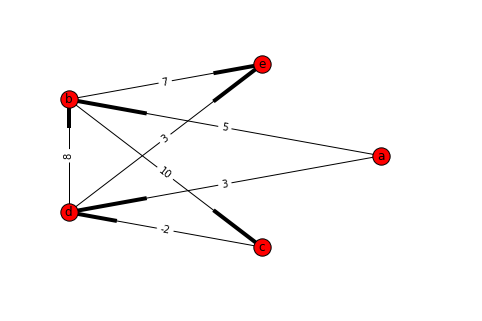

In [3]:
pos=nx.circular_layout(g)   # make sure to choose the appropriate layout function
edge_labels=dict([((u,v,),d['weight']) for u,v,d in g.edges(data=True)])

# edge_labels = nx.get_edge_attributes(g, 'weight')
nx.draw(g, pos, with_labels=True);
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels);

### 1.a Print the node-arc incidence matrix (the one with 0,+1, -1 as entries) as defined in class

In [4]:
inc_mat = nx.incidence_matrix(g, nodelist=sorted(g.nodes()), oriented = True, )

print(inc_mat.toarray())

[[-1. -1.  0.  0.  0.  0.  0.]
 [ 1.  0. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.]
 [ 0.  1.  0.  0. -1. -1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.]]


### 1.b Calculate and print the shortest-path matrix (shortest-paths between all pairs). Choose the appropriate algorithm from those available in Networkx.

In [5]:
pd.DataFrame(nx.floyd_warshall_numpy(g, nodelist=sorted(g.nodes()), weight='weight'), columns = sorted(g.nodes()), index = sorted(g.nodes()))

,a,b,c,d,e
a,0.000000,5.000000,15.000000,3.000000,6.0
b,inf,0.000000,10.000000,8.000000,7.0
c,inf,6.000000,0.000000,-2.000000,1.0
d,inf,8.000000,18.000000,0.000000,3.0
e,inf,inf,inf,inf,0.0


### 1.c Calculate the diameter of the graph (the longest shortest path amongst all the paths)

In order for a directed graph to have a diameter it has to be 'strongly connected'. A 'strongly connected' directed graph is a graph in which a node can be reached from any other node by traversing edges in the direction in which they point. Since our directed graph is not strongly connected it does not have a diameter.

In [6]:
# nx.diameter(g) -> returns an error because the directed graph is not strongly connected

### 1.e Check that it is a connected graph (of course, but by using a function)

There are two distinct notions of connectivity in a directed graph. A directed graph is weakly connected if there is an undirected path between any pair of vertices, and strongly connected if there is a directed path between every pair of vertices

In [7]:
nx.is_strongly_connected(g)

False

In [8]:
nx.is_weakly_connected(g)

True

### 2. Use the visualization routines in NetworkX and graphviz to draw the graph contained in 'HW__problem2.txt'

In [9]:
adjMatrix = pd.read_csv('HW2_problem2.txt', sep=" ", header = None)

# remove first column
adjMatrix = adjMatrix.drop(adjMatrix.columns[[0]], axis=1)

# divide matrix into matrix with connections, and matrix with weights
adjMatrixConn = adjMatrix[0:34]
adjMatrixWeights = adjMatrix[34:]

# re-index to 1
adjMatrixConn.index += 1 
# adjMatrixWeights.index += 1 
adjMatrixWeights.index = range(1,35)

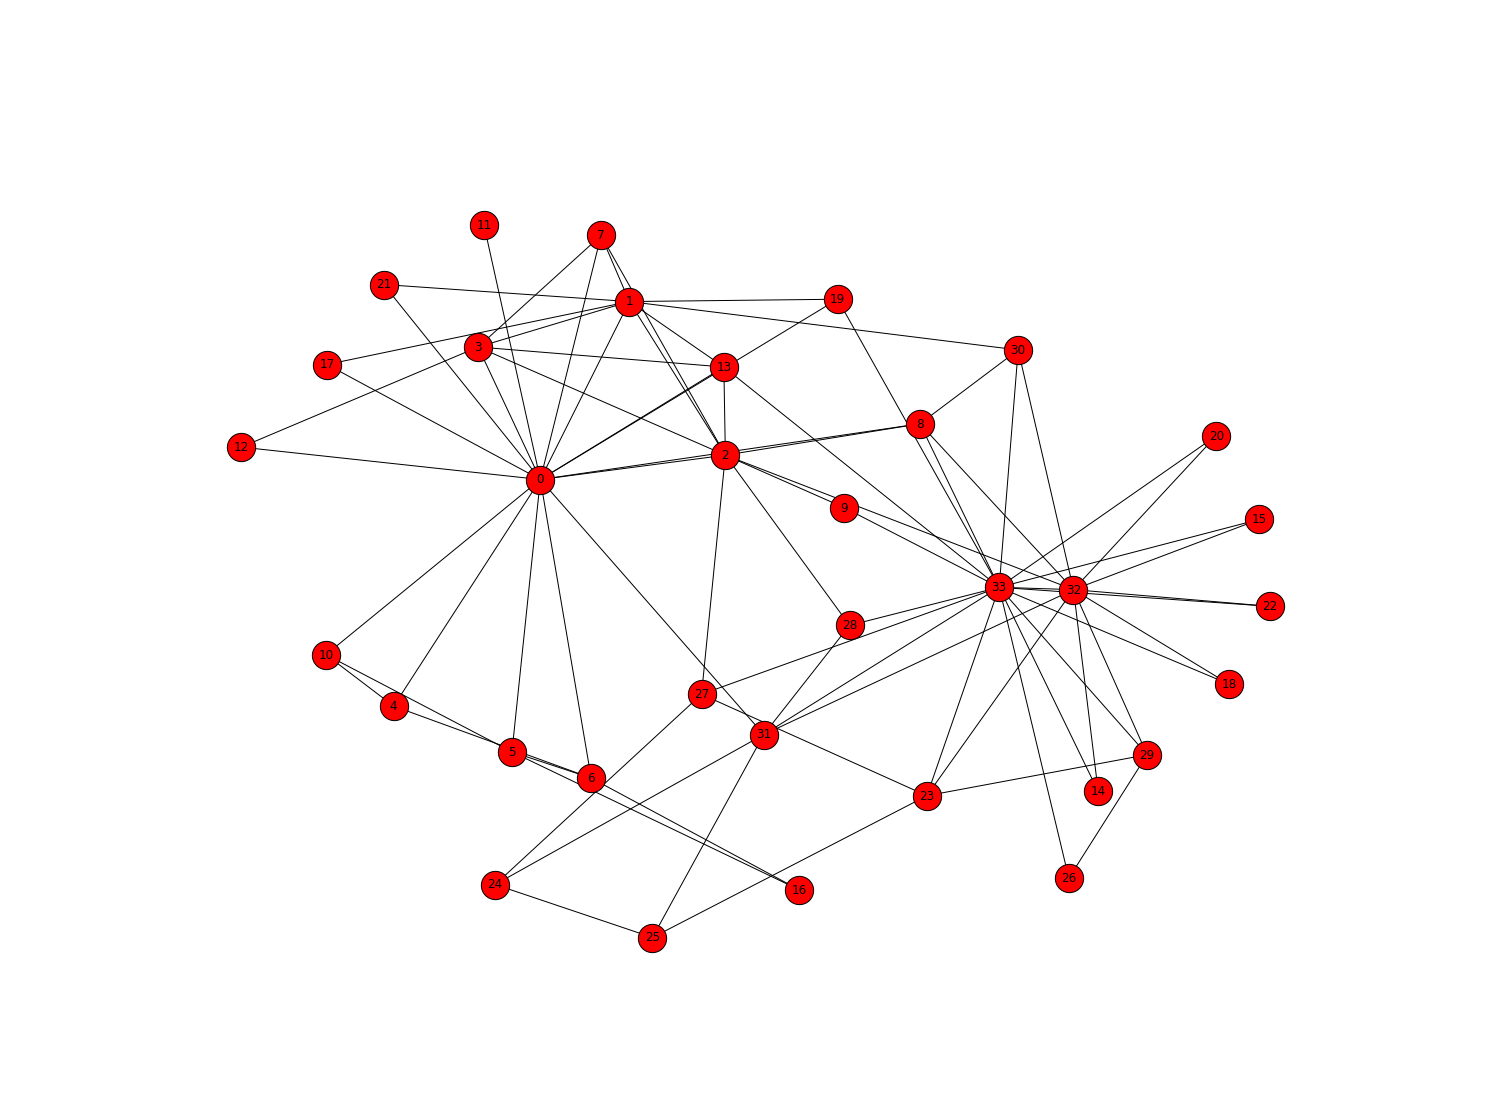

In [10]:
plt.figure(figsize=(20,15))
g1 = nx.Graph(adjMatrixConn.values)

nx.draw(g1, with_labels=True, node_size=800)

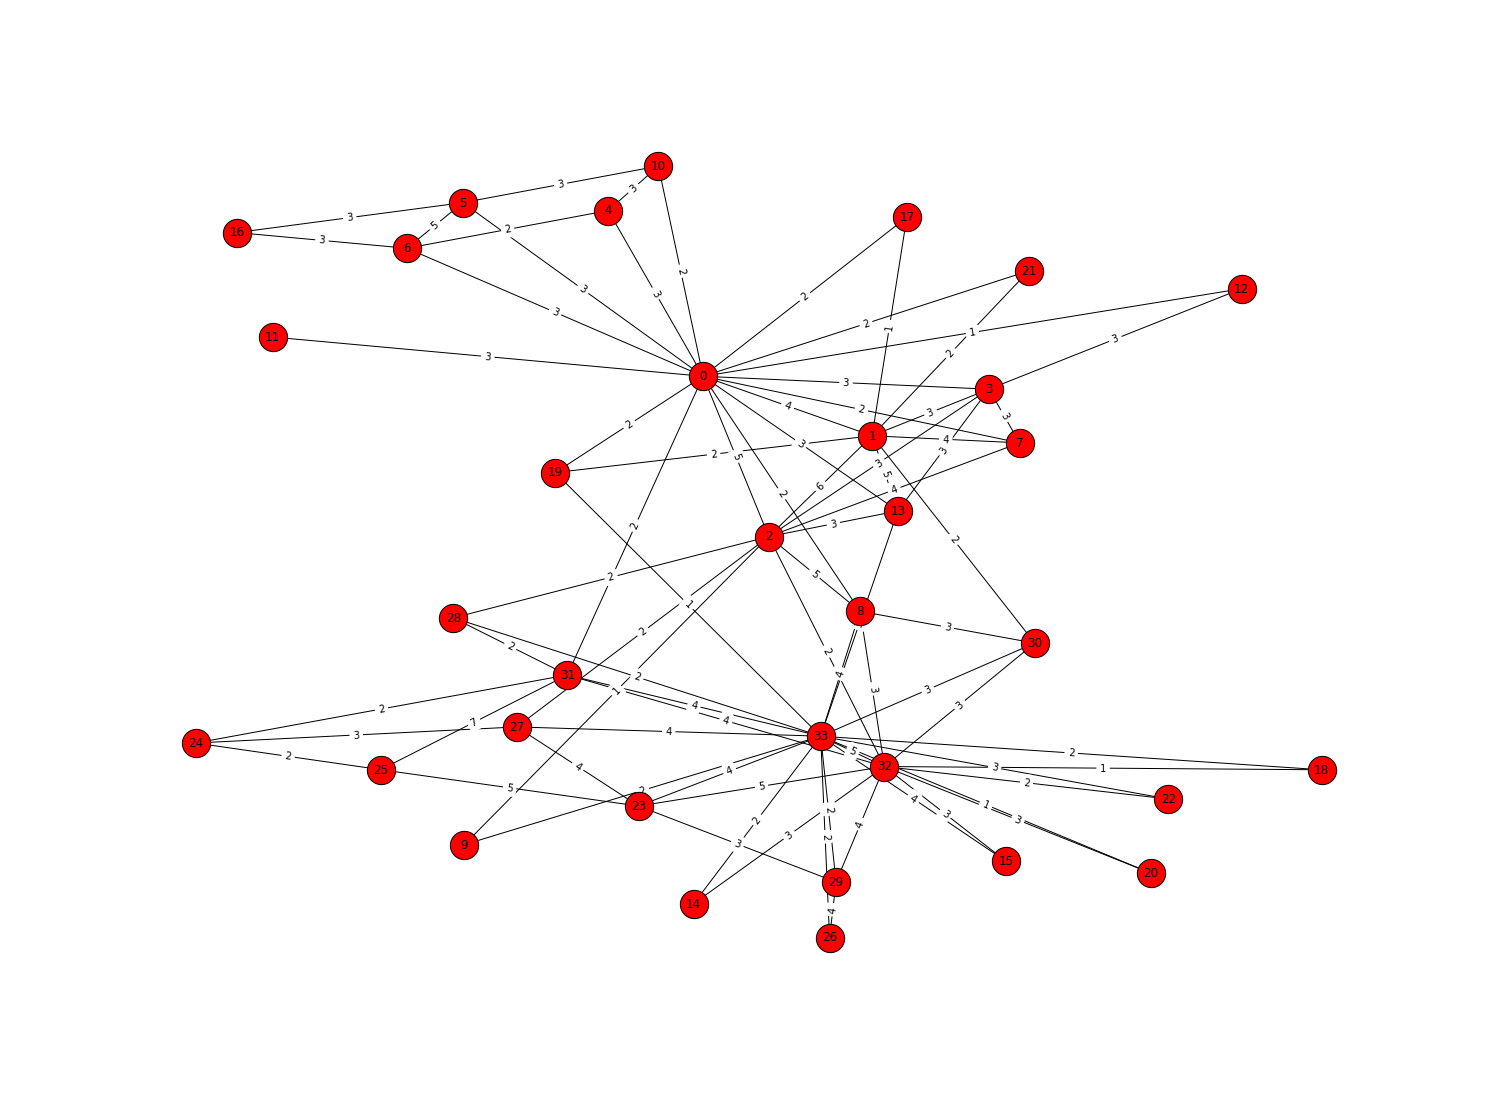

In [39]:
plt.figure(figsize=(20,15))
g2 = nx.Graph(adjMatrixWeights.values)
pos=nx.spring_layout(g2)
edge_labels=dict([((u,v),d['weight']) for u,v,d in g2.edges(data=True)])

nx.draw(g2, pos, edge_labels=edge_labels, with_labels=True, node_size=800);
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels);